# Bay Wheels's Trip Data Exploration and Visualization
## by Abdulmalik Alaql

## Preliminary Wrangling

GoBike is a public bike sharing system in USA. The dataset is about monthly individual trip data from Jan 2018 to Dec 2018.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

%matplotlib inline

In [4]:
folder_name = 'bike_data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
data_df = pd.concat(frames, ignore_index=True)
print(data_df.shape)
data_df.head()

(1863721, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 156.4+ MB


### Clean Data

In [9]:
# Convert station ID to string.
data_df['start_station_id'] =data_df['start_station_id'].astype('str')
data_df['end_station_id'] =data_df['end_station_id'].astype('str')

In [10]:
#Convert start_time and end_time to datatime.
data_df['start_time'] = pd.to_datetime(data_df['start_time'])
data_df['end_time'] = pd.to_datetime(data_df['end_time'])

In [11]:
# Convert bike ID to String.
data_df['bike_id'] =data_df['bike_id'].astype('str')

In [12]:
# Convert user type to category
data_df['user_type'] = data_df['user_type'].astype('category')

In [13]:
data_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845279 entries, 0 to 1845278
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1845279 non-null  int64         
 1   start_time               1845279 non-null  datetime64[ns]
 2   end_time                 1845279 non-null  datetime64[ns]
 3   start_station_id         1845279 non-null  object        
 4   start_station_name       1833770 non-null  object        
 5   start_station_latitude   1845279 non-null  float64       
 6   start_station_longitude  1845279 non-null  float64       
 7   end_station_id           1845279 non-null  object        
 8   end_station_name         1833770 non-null  object        
 9   end_station_latitude     1845279 non-null  float64       
 10  end_station_longitude    1845279 non-null  float64       
 11  bike_id                  1845279 non-null  object        
 12  

In [14]:
# Convert duration_sec to duration in minutes.
data_df ['duration_min'] = data_df ['duration_sec']/60

In [15]:
# extract the following information from start_time:
#1-start_date (yyyy-mm-dd) 2-start day of the week 3-start month 4- start hour of the day.

data_df['start_date'] = data_df.start_time.dt.strftime('%Y-%m-%d')
data_df['start_hour'] = data_df.start_time.dt.strftime('%H')
data_df['start_day'] = data_df.start_time.dt.strftime('%A')
data_df['start_month'] = data_df.start_time.dt.strftime('%B')

In [16]:
data_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min,start_date,start_hour,start_day,start_month
0,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,No,7.550000,2018-01-31,23,Wednesday,January
1,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,No,3.000000,2018-01-31,23,Wednesday,January
2,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,Yes,16.600000,2018-01-31,23,Wednesday,January
3,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,Yes,13.750000,2018-01-31,23,Wednesday,January
4,1316,2018-01-31 23:24:00.416,2018-01-31 23:45:56.824,98.0,Valencia St at 16th St,37.765052,-122.421866,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,1278,Customer,No,21.933333,2018-01-31,23,Wednesday,January


In [35]:
data_df.to_csv('GoBike_2018_part2.csv',index=False)

### What is the structure of your dataset?

The dataset contains about 1.8 Million records (trip) with 14 variables.
The variables are about:
<li> <b>station: </b>start_station_id, start_station_name, start_station_latitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude. </li>
<li> <b>Trip: </b> duration_sec, start_time, end_time </li>
<li> <b>member: </b>user_type, bike_id,bike_share_for_all_trip.  </li>

### What is/are the main feature(s) of interest in your dataset?

I wnat to answer the some of the qustions such as : How long the average trip take? what time is always have the higher rate of trips (hour, day, month)? what is the difference in usage between Customer and Subscriber?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
1-user_type 
2-start_date
3-start_hourofday
4-start_dayofweek
5-start_month
6-duration_min
7-bike_share_for_all_trip

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

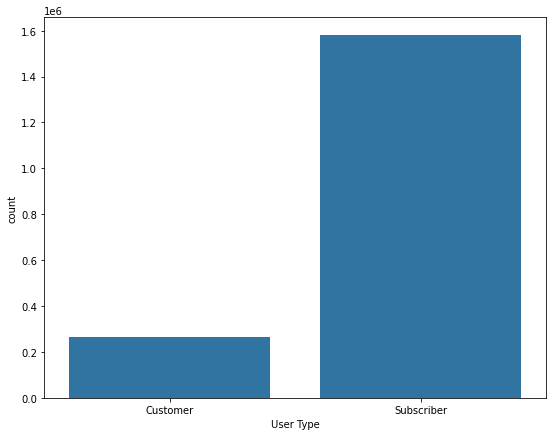

In [17]:
plt.rcParams['figure.figsize'] = 9, 7
base_color = sb.color_palette()[0]
sb.countplot(data=data_df,x='user_type',color=base_color);
plt.xlabel('User Type');

In [18]:
cus = data_df.user_type.value_counts()[0]
sub = data_df.user_type.value_counts()[1]
print('The majorety of the user are Subscriber ({:.2f}%)'.format(sub/(sub+cus)*100))

The majorety of the user are Subscriber (85.59%)


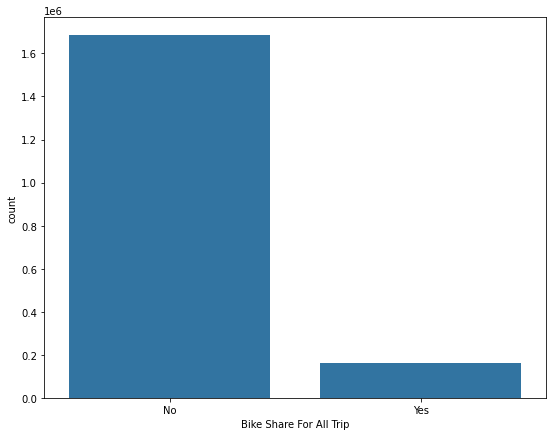

In [19]:
sb.countplot(data=data_df,x='bike_share_for_all_trip',color=base_color);
plt.xlabel('Bike Share For All Trip');

In [20]:
yes = data_df.bike_share_for_all_trip.value_counts()[0]
no = data_df.bike_share_for_all_trip.value_counts()[1]
print('The majorety of bike share for all trip is no ({:.2f}%)'.format(yes/(yes+no)*100))

The majorety of bike share for all trip is no (91.25%)


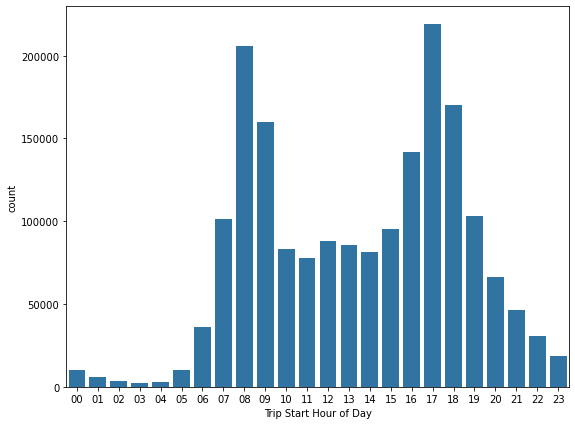

In [21]:
sb.countplot(data=data_df,x='start_hour',color=base_color);
plt.xlabel('Trip Start Hour of Day');

The majorety of the trip start hour is between 7 to 9 and 16 to 18

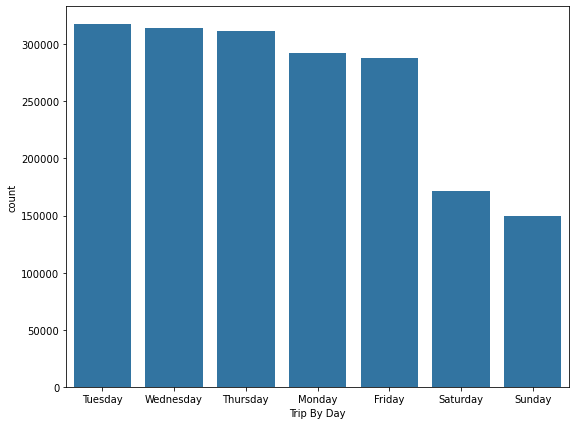

In [22]:
sb.countplot(data=data_df,x='start_day',color=base_color, order=data_df['start_day'].value_counts().index);
plt.xlabel('Trip By Day');

The majorety of the trip days are the workdays

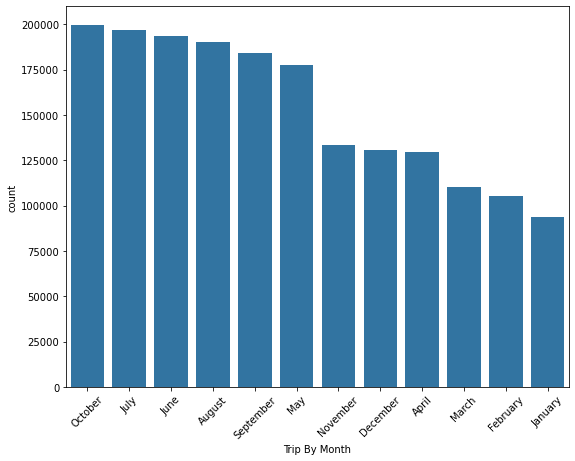

In [23]:
sb.countplot(data=data_df,x='start_month',color=base_color, order=data_df['start_month'].value_counts().index);
plt.xticks(rotation=45);
plt.xlabel('Trip By Month');

We can see that October has the most number of trips.

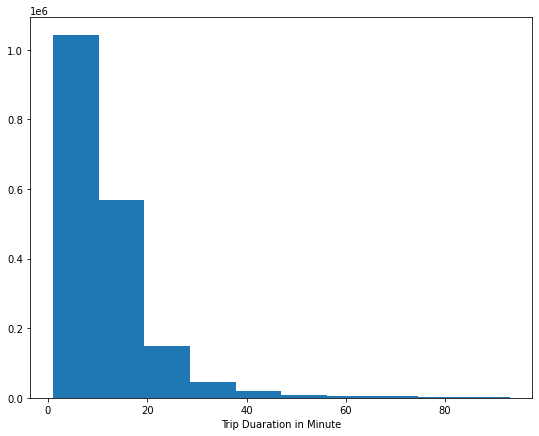

In [24]:
plt.hist(data=data_df,x='duration_min');
plt.xlabel('Trip Duaration in Minute');

In [25]:
data_df['duration_min'].describe(percentiles=[.99])

count    1.845279e+06
mean     1.166336e+01
std      9.644105e+00
min      1.016667e+00
50%      9.183333e+00
99%      5.311667e+01
max      9.300000e+01
Name: duration_min, dtype: float64

We can see the most of the trips duaration was less than 200 min, However we can see outliere very far to the right with value 1439 min ! I will see the trips withn 93 min duration. becuase 99% of the trip in this range.

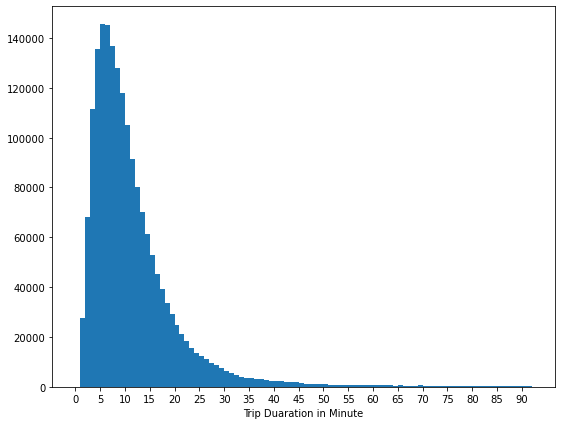

In [26]:
bins= np.arange(0,93,1)
ticks = np.arange(0, 93, 5)
plt.hist(data=data_df,x='duration_min',bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duaration in Minute');

We can see the majorety of the trip between 5 to 15 min. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The majorety of the trip was between 5 to 15 minutes, but there was outlier for very long trip (about 24 hours).

Most of the user was Subscriber (84.97%).

The majorety of the trip was between 7-9AM and 16-19PM. I think this is because it's the time when people go to work and come back from it.

The majorety of the trip was on works days (Monday-Friday)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the trip duration was useless (becuase some high value trip duration), but I use range of the trip from 0-90 mintites (most trip was on this range). Then the distribution become usefull.

## Bivariate Exploration

Average trip duration on days

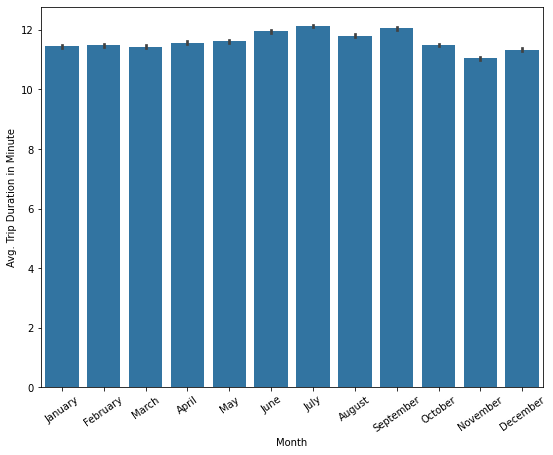

In [27]:
sb.barplot(data=data_df, x='start_month', y='duration_min', color=base_color,order=['January','February','March','April','May','June','July','August','September','October','November','December']);
plt.xticks(rotation=35);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');

Daily usage and the difference between customers and subscribers

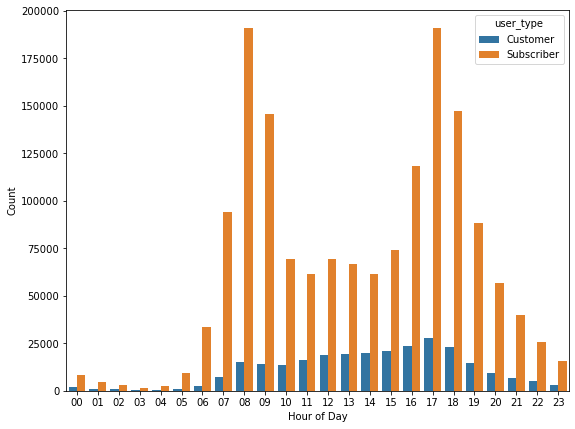

In [28]:
sb.countplot(data=data_df, x='start_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

We can see the subscriber trip between 7 to 9 and 16 to 18 are the highst, this is because this is the time when people go and come back from the work

weekly usage and the difference between customers and subscribers

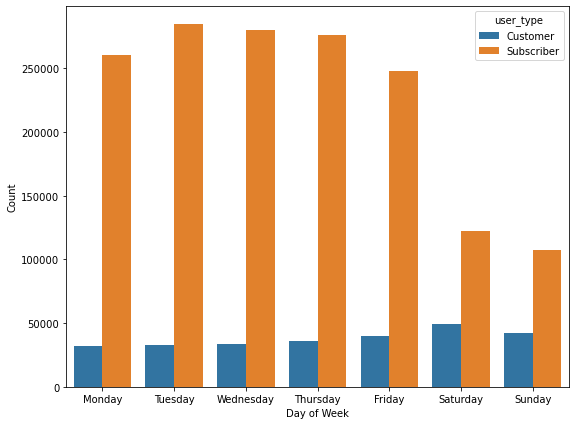

In [29]:
sb.countplot(data=data_df, x='start_day', hue='user_type',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
plt.xlabel('Day of Week');
plt.ylabel('Count');

We can see that the subscriber have much less trip on weekends. I think becuase they use the bikes to go to thier work.

monthly usage and the difference between customers and subscribers

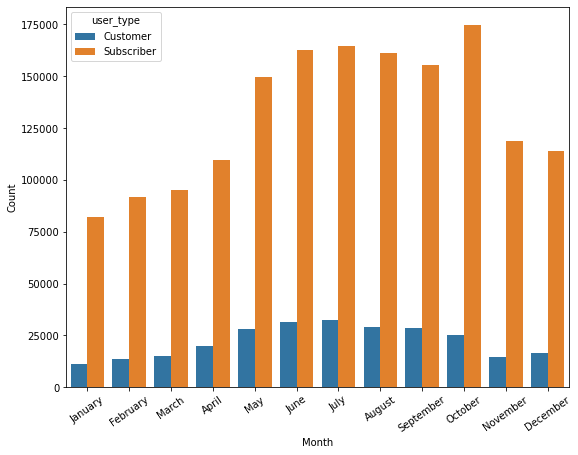

In [30]:
sb.countplot(data=data_df, x='start_month', hue='user_type',order=['January','February','March','April','May','June','July','August','September','October','November','December']);
plt.xticks(rotation=35);
plt.xlabel('Month');
plt.ylabel('Count');

who take a longer trip?

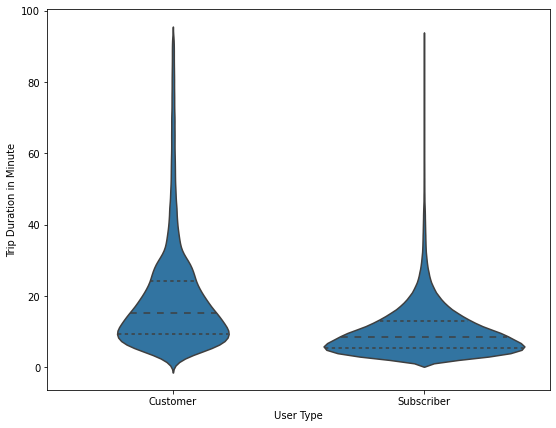

In [31]:
sb.violinplot(data=data_df, x='user_type', y='duration_min',  color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

We can see that the customer usually have longer trip than the subscriber.

Average trip duration on days

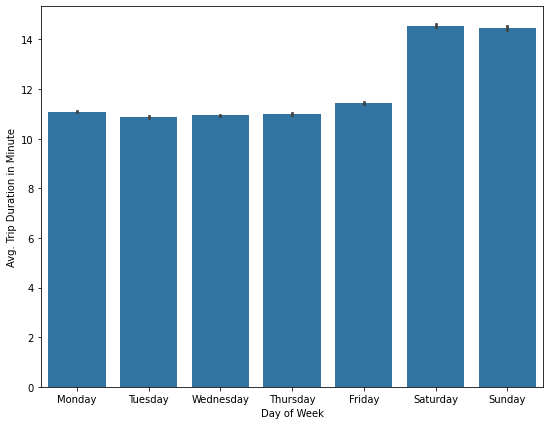

In [32]:
sb.barplot(data=data_df, x='start_day', y='duration_min', color=base_color,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

We can see Saturday and Sunday have the highest Ang trip duration, this is because these days when the customer use the bike the most, and the customer has higher avg trip duration

Average trip duration on months

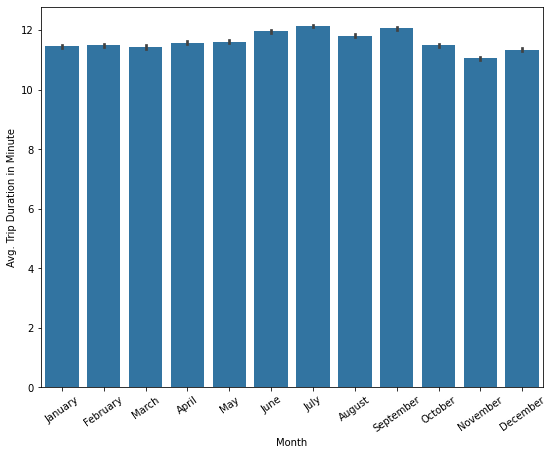

In [33]:
sb.barplot(data=data_df, x='start_month', y='duration_min', color=base_color,order=['January','February','March','April','May','June','July','August','September','October','November','December']);
plt.xticks(rotation=35);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

First, there are a lot more subscriber than customers. We see how Subscribers use the bike to go to the work (most of their trips was on workdays and on work time from 7 to 9 and from 16 to 18. and I think the customer use the bike just for fun because they usually use it on weekend and thier Avg trip duration higher that the subscriber. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The subscriber has less Avg trip duratin that customer, The most rides for the customer from Jun to Aug and I think they like ti use the bike on the summer time. 

## Multivariate Exploration

<b>please see Multivariate_Exploration.ipynb